In [1]:
import os
import re
import torch
import pickle
import argparse
import logging
from models import WLDA
from utils import *
from dataset import DocDataset
from multiprocessing import cpu_count

In [2]:
taskname = 'cnews10k'
no_below = 5
no_above = 0.013
num_epochs = 500
n_topic = 20
n_cpu = cpu_count()-2 if cpu_count()>2 else 2
bkpt_continue = False
use_tfidf = False
rebuild = True
dist = 'gmm_std'

In [3]:
device = torch.device('cuda')
docSet = DocDataset(taskname,no_below=no_below,no_above=no_above,rebuild=rebuild,use_tfidf=False)
voc_size = docSet.vocabsize
print('voc size:',voc_size)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

Tokenizing ...


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 3068.44it/s]


Processed 9884 documents.
voc size: 3268


In [4]:
model = WLDA(bow_dim=voc_size,n_topic=n_topic,device=device,dist=dist,taskname=taskname)

Epoch   1	Iter   10	Loss:38.4783974	Rec Loss:34.5597000	MMD:3.9186962
Epoch   1	Iter   20	Loss:48.0978503	Rec Loss:35.4868008	MMD:12.6110480
Epoch   2	Iter   10	Loss:37.9760628	Rec Loss:35.2150192	MMD:2.7610426
Epoch   2	Iter   20	Loss:41.2583258	Rec Loss:34.0772110	MMD:7.1811140
Epoch   3	Iter   10	Loss:35.4107552	Rec Loss:33.3361359	MMD:2.0746179
Epoch   3	Iter   20	Loss:40.6109337	Rec Loss:33.6337171	MMD:6.9772175
Epoch   4	Iter   10	Loss:35.6774483	Rec Loss:33.7492332	MMD:1.9282167
Epoch   4	Iter   20	Loss:36.4807567	Rec Loss:31.0378574	MMD:5.4429000
Epoch   5	Iter   10	Loss:35.4710655	Rec Loss:33.8536148	MMD:1.6174500
Epoch   5	Iter   20	Loss:36.6533892	Rec Loss:32.3829377	MMD:4.2704526
Epoch   6	Iter   10	Loss:34.6961517	Rec Loss:33.4347801	MMD:1.2613734
Epoch   6	Iter   20	Loss:38.5830892	Rec Loss:35.0449219	MMD:3.5381677
Epoch   7	Iter   10	Loss:32.6405373	Rec Loss:31.7281227	MMD:0.9124154
Epoch   7	Iter   20	Loss:34.7200521	Rec Loss:32.0822253	MMD:2.6378283
Epoch   8	Iter   10

Epoch  30	Loss:29.6701150
['考生', '指', '专家', '送', '高校', '生活', '考研', '60', '关注', '今日', '热', '网上', '学生', '市场', '新生']
['世界', '互联网', '力', '活动', '曝光', '揭秘', '朝鲜', '伊朗', '经济', '余', '媒体', '谈', '人民币', '万元', '美']
['获', '公布', '刑', '现', '投资', '首', '美元', '评级', '批', '企业', '推荐', '教育', '欲', '20', '第一']
['活动', '网友', '写真', '助阵', '台湾', '幻想', '爱情', '街头', '女生', '秀', '变', '热播', '完美', '万元', '发']
['回应', '女', '俄罗斯', '出席', '呼吁', '访问', '香港', '网友', '万元', '自曝', '官员', '明星', '活动', '医生', '儿子']
['拍', '否认', '男友', '总理', '持刀', 'MV', '抢劫', '性感', '民警', '伊朗', '辞职', '总统', '以色列', '儿童', '泰国']
['美元', '正式', '网', '伤', '银行', '评级', '获', '死', '上市', '收购', '网游', '全球', '剑', '上海', 'OL']
['经济', '图文', '调查', '发布', '媒体', '微博', '数', '学生', '复苏', '款', '未', '做好', '德国', '国家', '对话']
['平起', '开盘', '精装', '沪', '期货', '别墅', '震荡', '考研', '盘', '涨', '现房', '享', '平米', '录取', '反弹']
['OL', '日本', '首次', '美', '英国', '手机', '劫', '曝光', '朝鲜', 'online', '内容', '手游', '赤壁', '梦幻', '公开']
['朝鲜', '世界', '美', '媒体', '日本', '互联网', '曝光', '伊朗', '玩家', '余', '云', '模式', '升级', '公司', '经济']

c_v:0.556723942460218, c_w2v:0.9957742691040039, c_uci:-11.54210214556773, c_npmi:-0.37023867306372404
mimno topic coherence:-200.85218247132548
Epoch  51	Iter   10	Loss:27.6650314	Rec Loss:27.4519501	MMD:0.2130806
Epoch  51	Iter   20	Loss:28.0015024	Rec Loss:27.2062519	MMD:0.7952496
Epoch  52	Iter   10	Loss:28.6550407	Rec Loss:28.3637924	MMD:0.2912474
Epoch  52	Iter   20	Loss:29.6912310	Rec Loss:28.7639911	MMD:0.9272386
Epoch  53	Iter   10	Loss:27.5582256	Rec Loss:27.2532825	MMD:0.3049427
Epoch  53	Iter   20	Loss:27.5432223	Rec Loss:26.5975968	MMD:0.9456256
Epoch  54	Iter   10	Loss:27.5517273	Rec Loss:27.2988930	MMD:0.2528344
Epoch  54	Iter   20	Loss:31.2452612	Rec Loss:30.0272937	MMD:1.2179669
Epoch  55	Iter   10	Loss:27.5996971	Rec Loss:27.2978096	MMD:0.3018878
Epoch  55	Iter   20	Loss:28.2398024	Rec Loss:27.2707895	MMD:0.9690116
Epoch  56	Iter   10	Loss:27.6606693	Rec Loss:27.4186287	MMD:0.2420402
Epoch  56	Iter   20	Loss:27.8146534	Rec Loss:26.9323699	MMD:0.8822838
Epoch  57	Iter 

Epoch  80	Iter   10	Loss:25.2361889	Rec Loss:24.9618855	MMD:0.2743029
Epoch  80	Iter   20	Loss:27.3320845	Rec Loss:25.9630346	MMD:1.3690493
Epoch  80	Loss:25.6488588
['考生', '高校', '招生', '自主', '2009', '网上', '北大', '09', '学生', '考试', '专家', '推荐', '家长', '中考', '新生']
['世界', '互联网', '云', '升值', '盛大', '人民币', '之遥', '集', '攻略', '力', 'ol', '体系', '完美', '秘诀', '版权']
['获', '现', '覆盖', '惊', '建行', '刑', '芯', '精品', '强', '售价', '皇马', '世界', '蛙', '古力', '方正']
['追', '中方', '骗局', '砍', '封', '寻找', '各方', '小姐', '言论', '回家', '走出', '19', '女生', '错过', '选举']
['访问', '网友', '俄罗斯', '明星', '胡锦涛', '回应', '出席', '广告', '微博', '楼', '官员', '惹', '呼吁', '导演', '峰会']
['男友', '打击', '组建', '外长', '伊朗', '公安部', '海盗', '部队', '签署', '军方', '会谈', '索马里', '反政府', '叙利亚', '辞职']
['评级', '买入', '目标价', '瑞银', '花旗', '股票', '上调', '持有', '调', '主帅', '下调', '第三季度', '中国队', '油田', '出售']
['经济', '复苏', '调查', '导购', '房地产', '分钟', '发布', '发展', '对话', '收费', '虚拟', '国内', '陕西', '做好', '笔']
['平起', '精装', '平米', '别墅', '现房', '全款', '开盘', '居在', '享', '98', '优惠', '城', '95', '公寓', '朝阳']
['OL', '劫', '梦幻', '

c_v:0.5183053625094497, c_w2v:0.9951306581497192, c_uci:-10.916341434046116, c_npmi:-0.32907100467856276
mimno topic coherence:-159.96838532263612
Epoch 101	Iter   10	Loss:23.2010231	Rec Loss:22.8465614	MMD:0.3544614
Epoch 101	Iter   20	Loss:24.6970966	Rec Loss:23.5554716	MMD:1.1416246
Epoch 102	Iter   10	Loss:22.9770432	Rec Loss:22.6371384	MMD:0.3399040
Epoch 102	Iter   20	Loss:24.5414131	Rec Loss:23.2742638	MMD:1.2671494
Epoch 103	Iter   10	Loss:22.9654026	Rec Loss:22.6119537	MMD:0.3534483
Epoch 103	Iter   20	Loss:24.6593049	Rec Loss:23.6215977	MMD:1.0377074
Epoch 104	Iter   10	Loss:22.7707272	Rec Loss:22.4555435	MMD:0.3151835
Epoch 104	Iter   20	Loss:24.9306797	Rec Loss:23.7188283	MMD:1.2118518
Epoch 105	Iter   10	Loss:22.6119461	Rec Loss:22.2942734	MMD:0.3176726
Epoch 105	Iter   20	Loss:20.8264880	Rec Loss:19.9078620	MMD:0.9186258
Epoch 106	Iter   10	Loss:23.9865093	Rec Loss:23.6517525	MMD:0.3347569
Epoch 106	Iter   20	Loss:24.7686705	Rec Loss:23.6387752	MMD:1.1298948


KeyboardInterrupt: 

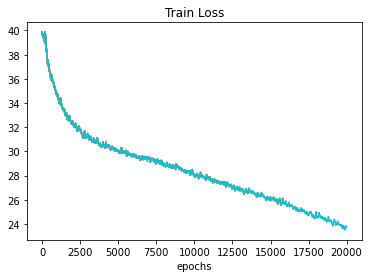

In [5]:
model.train(train_data=docSet,batch_size=512,test_data=docSet,num_epochs=num_epochs,log_every=10,beta=1.0)